***Classification Algorithms***

1)Logistic Regression

Model predicts whether a student will pass based on study hours

prints accuracy score

Plots the logistic regression curve

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score


***Create a small Dataset***

Lets assume we have a dataset where :

Feature (X) represents teh number of study hours.

Target (y) represents whether a student passed(1) or failed(0)

In [30]:
import numpy as np
# Example dataset : study Hours vs Pass/FAil (Binary Classification)
x=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])# Study hours
y=np.array([0,0,0,0,1,1,1,1,1,1]) # 0=Fail , 1=pass

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

***Train Logistic Regression Model***

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

***Make Predictions***

In [36]:
y_pred = model.predict(x_test)
print("Predictions :",y_pred)

Predictions : [1 0]


In [51]:
accuracy = accuracy_score(y_test,y_pred)
print("predictions",y_pred)
print(f"Accuracy : {accuracy:.2f}")

predictions [1 0]
Accuracy : 1.00


***Visualize the Logistic Regression Curve***

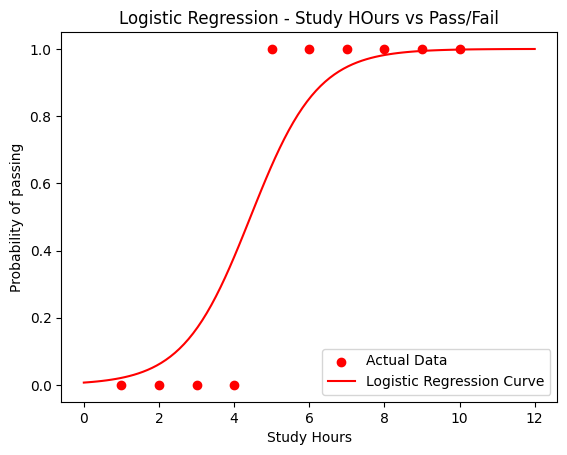

In [44]:
x_range = np.linspace(0,12,100).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]

plt.scatter(x,y,color="red",label="Actual Data")
plt.plot(x_range,y_prob,color="red",label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of passing")
plt.title("Logistic Regression - Study HOurs vs Pass/Fail")
plt.legend()
plt.show()

***We will use the Heart Disease Dataset from Kaggle to predict whether a patient has heart disease or not***

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc


In [60]:

import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

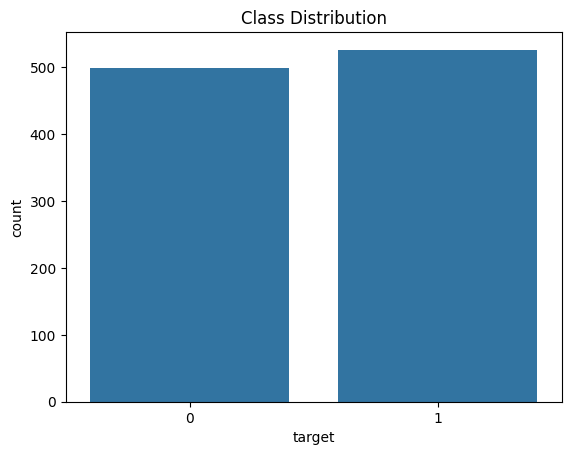

In [62]:
# Check for missing values
print(df.isnull().sum())
# Summary statistics
print(df.describe())
# Check class Distribution
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

***Feature Selection and Preprocessing***

In [67]:
# Define independent variables (x) and target variable(y)
x=df.drop("target",axis=1)
y=df["target"]
#split the dataset into training and testing sets (80 -20 split)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)
# Standardize the features
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


***Train Logistic Regression Model***

In [73]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train,y_train)
# Predict on trest data
y_pred = model.predict(x_test)

***Model Evaluation***

Accuracy : 0.80

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



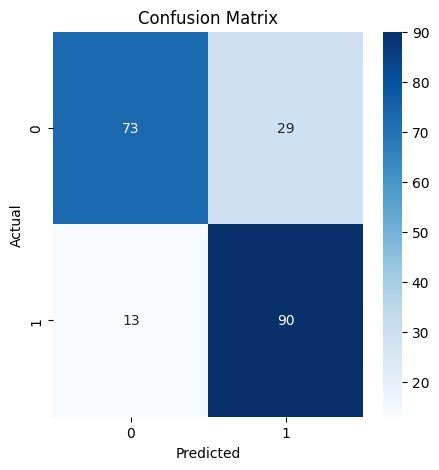

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy:.2f}")
#Classifiaction Report
print("\n Classification Report:\n",classification_report(y_test,y_pred))
#Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()